In [ ]:
import pandas as pd

# Re-loading the dataset as the code execution environment was reset
file_path = '/content/raw_sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and some basic information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


(None,
               datesold  postcode   price propertyType  bedrooms
 0  2007-02-07 00:00:00      2607  525000        house         4
 1  2007-02-27 00:00:00      2906  290000        house         3
 2  2007-03-07 00:00:00      2905  328000        house         3
 3  2007-03-09 00:00:00      2905  380000        house         4
 4  2007-03-21 00:00:00      2906  310000        house         3)

In [ ]:
# Data Preprocessing

# Convert 'datesold' to datetime format
data['datesold'] = pd.to_datetime(data['datesold'])

# Checking for any anomalies or outliers in 'price' and 'bedrooms'
price_describe = data['price'].describe()
bedrooms_describe = data['bedrooms'].describe()

# Encode the 'propertyType' categorical data
property_type_encoded = pd.get_dummies(data['propertyType'], prefix='type')

# Merging the encoded data back with the original dataframe
data_processed = pd.concat([data, property_type_encoded], axis=1).drop('propertyType', axis=1)

price_describe, bedrooms_describe, data_processed.head()

(count    2.958000e+04
 mean     6.097363e+05
 std      2.817079e+05
 min      5.650000e+04
 25%      4.400000e+05
 50%      5.500000e+05
 75%      7.050000e+05
 max      8.000000e+06
 Name: price, dtype: float64,
 count    29580.000000
 mean         3.250169
 std          0.951275
 min          0.000000
 25%          3.000000
 50%          3.000000
 75%          4.000000
 max          5.000000
 Name: bedrooms, dtype: float64,
     datesold  postcode   price  bedrooms  type_house  type_unit
 0 2007-02-07      2607  525000         4           1          0
 1 2007-02-27      2906  290000         3           1          0
 2 2007-03-07      2905  328000         3           1          0
 3 2007-03-09      2905  380000         4           1          0
 4 2007-03-21      2906  310000         3           1          0)

In [ ]:
# Feature Engineering: Extracting time-related features

# Extracting year, month, and day of the week from 'datesold'
data_processed['year_sold'] = data_processed['datesold'].dt.year
data_processed['month_sold'] = data_processed['datesold'].dt.month
data_processed['day_of_week_sold'] = data_processed['datesold'].dt.dayofweek  # Monday=0, Sunday=6

# Displaying the first few rows of the updated dataset
data_processed_head = data_processed.head()

# Getting basic statistics of the new features
year_sold_stats = data_processed['year_sold'].value_counts().sort_index()
month_sold_stats = data_processed['month_sold'].value_counts().sort_index()
day_of_week_sold_stats = data_processed['day_of_week_sold'].value_counts().sort_index()

data_processed_head, year_sold_stats, month_sold_stats, day_of_week_sold_stats

(    datesold  postcode   price  bedrooms  type_house  type_unit  year_sold  \
 0 2007-02-07      2607  525000         4           1          0       2007   
 1 2007-02-27      2906  290000         3           1          0       2007   
 2 2007-03-07      2905  328000         3           1          0       2007   
 3 2007-03-09      2905  380000         4           1          0       2007   
 4 2007-03-21      2906  310000         3           1          0       2007   
 
    month_sold  day_of_week_sold  
 0           2                 2  
 1           2                 1  
 2           3                 2  
 3           3                 4  
 4           3                 2  ,
 2007     147
 2008     639
 2009    1426
 2010    1555
 2011    1633
 2012    1858
 2013    2119
 2014    2863
 2015    3648
 2016    3908
 2017    4541
 2018    3858
 2019    1385
 Name: year_sold, dtype: int64,
 1     1304
 2     2656
 3     2878
 4     2468
 5     2797
 6     2213
 7     2386
 8     2429
 9 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Choosing normalization (MinMaxScaler) as it's more suitable for non-Gaussian distributions
# and more robust to outliers

# Selecting numerical columns for normalization
numerical_columns = ['price', 'bedrooms', 'postcode', 'year_sold', 'month_sold', 'day_of_week_sold']
scaler = MinMaxScaler()

# Normalizing the numerical columns
data_normalized = data_processed.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data_processed[numerical_columns])

# Displaying the first few rows of the normalized data
normalized_head = data_normalized.head()

# Checking the new scaled values
normalized_stats = data_normalized[numerical_columns].describe()

normalized_head, normalized_stats

(    datesold  postcode     price  bedrooms  type_house  type_unit  year_sold  \
 0 2007-02-07  0.022293  0.058979       0.8           1          0        0.0   
 1 2007-02-27  0.974522  0.029395       0.6           1          0        0.0   
 2 2007-03-07  0.971338  0.034179       0.6           1          0        0.0   
 3 2007-03-09  0.971338  0.040725       0.8           1          0        0.0   
 4 2007-03-21  0.974522  0.031913       0.6           1          0        0.0   
 
    month_sold  day_of_week_sold  
 0    0.090909          0.333333  
 1    0.090909          0.166667  
 2    0.181818          0.333333  
 3    0.181818          0.666667  
 4    0.181818          0.333333  ,
               price      bedrooms      postcode     year_sold    month_sold  \
 count  29580.000000  29580.000000  29580.000000  29580.000000  29580.000000   
 mean       0.069646      0.650034      0.414808      0.635443      0.519479   
 std        0.035464      0.190255      0.467253      0.24702

In [ ]:
from sklearn.cluster import DBSCAN

# Parameter Selection for DBSCAN
# These parameters may need to be fine-tuned depending on the initial results
eps = 0.3  # Example epsilon value
min_samples = 10  # Minimum number of samples for a core point

# Applying DBSCAN to the dataset
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan_model.fit_predict(data_normalized[numerical_columns])

# Adding the cluster labels to our dataset
data_clustered = data_normalized.copy()
data_clustered['cluster'] = cluster_labels

# Evaluating the Clustering Results
# Counting the number of points in each cluster and the number of noise points (-1 label)
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

cluster_counts, data_clustered.head()

(-1        9
  0    17615
  1    11956
 dtype: int64,
     datesold  postcode     price  bedrooms  type_house  type_unit  year_sold  \
 0 2007-02-07  0.022293  0.058979       0.8           1          0        0.0   
 1 2007-02-27  0.974522  0.029395       0.6           1          0        0.0   
 2 2007-03-07  0.971338  0.034179       0.6           1          0        0.0   
 3 2007-03-09  0.971338  0.040725       0.8           1          0        0.0   
 4 2007-03-21  0.974522  0.031913       0.6           1          0        0.0   
 
    month_sold  day_of_week_sold  cluster  
 0    0.090909          0.333333        0  
 1    0.090909          0.166667        1  
 2    0.181818          0.333333        1  
 3    0.181818          0.666667        1  
 4    0.181818          0.333333        1  )

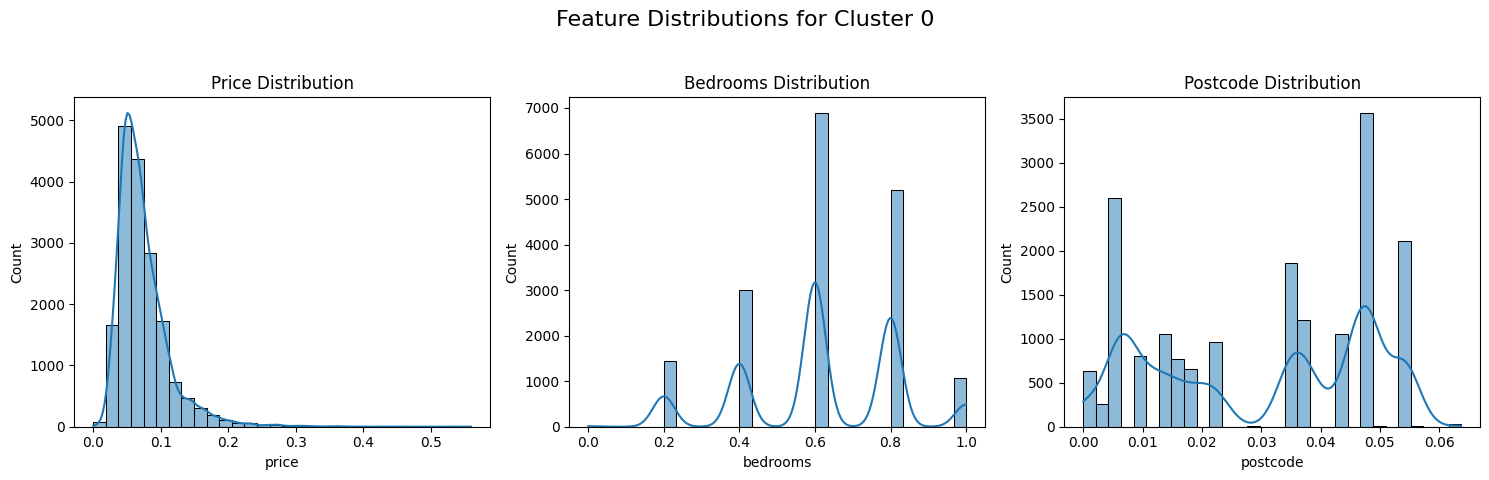

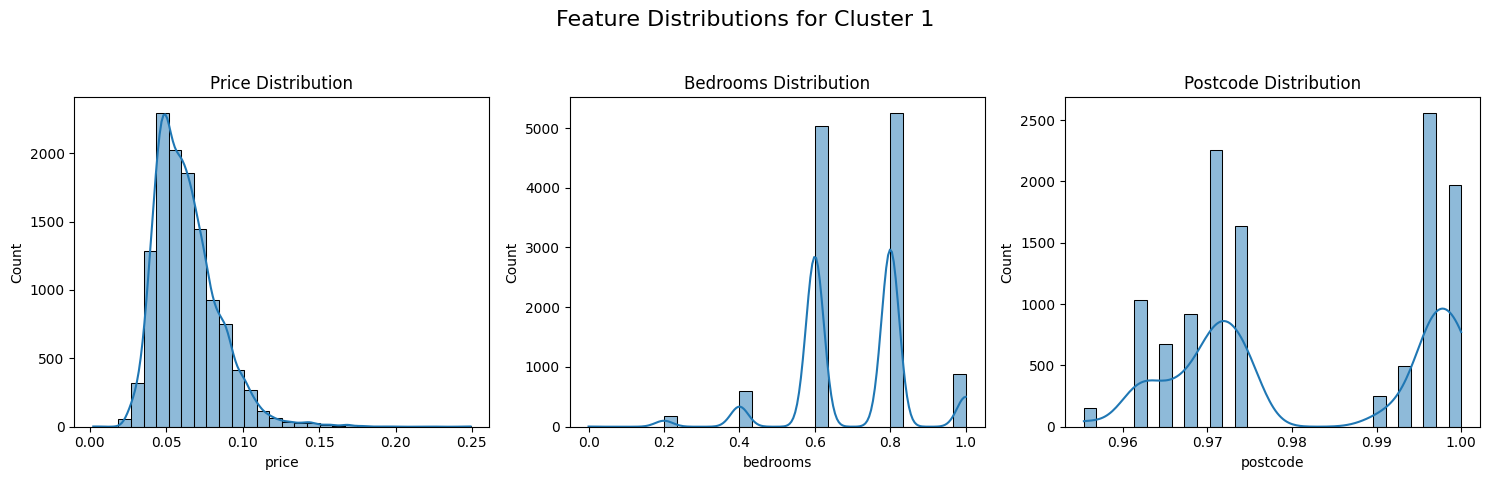

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing Cluster Characteristics

# Preparing data for analysis
cluster_0 = data_clustered[data_clustered['cluster'] == 0]
cluster_1 = data_clustered[data_clustered['cluster'] == 1]
noise_data = data_clustered[data_clustered['cluster'] == -1]

# Analyzing key features for each cluster
def analyze_cluster_features(cluster_data, cluster_label):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Feature Distributions for Cluster {cluster_label}', fontsize=16)

    sns.histplot(cluster_data['price'], bins=30, ax=axes[0], kde=True)
    axes[0].set_title('Price Distribution')

    sns.histplot(cluster_data['bedrooms'], bins=30, ax=axes[1], kde=True)
    axes[1].set_title('Bedrooms Distribution')

    sns.histplot(cluster_data['postcode'], bins=30, ax=axes[2], kde=True)
    axes[2].set_title('Postcode Distribution')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Analyzing clusters
analyze_cluster_features(cluster_0, 0)
analyze_cluster_features(cluster_1, 1)

# If needed, analyzing noise data
# analyze_cluster_features(noise_data, 'Noise')